# Clasificación de Noticias con Naive Bayes

Este cuaderno aplica el algoritmo Naive Bayes para la detección de noticias falsas utilizando distintos fragmentos del texto: el título, el cuerpo completo y ambos combinados.

Para cada enfoque se realiza:
- Preparación del conjunto de datos
- Entrenamiento del modelo
- Evaluación mediante matriz de confusión y curva ROC
- Guardado del modelo entrenado

In [4]:
import pandas as pd
import sys
sys.path.append('../src') 
from models import train_naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from metrics import plot_roc_auc
from metrics import plot_feature_importance
from metrics import plot_confusion_matrix

In [5]:
# Ruta a los datos 
path = '../data/processed/listo.csv' 

# Cargar CSVs
df = pd.read_csv(path, keep_default_na=False)

### Naive Bayes solo título

In [6]:
X = df[['title', 'category']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [7]:
NBtitle = train_naive_bayes(X_train, y_train)
NBtitle

Mejores parámetros encontrados: {'clf__alpha': 2.0, 'clf__fit_prior': False}
Mejor accuracy promedio (cv=5): 0.8640688944650142


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('texto',
                                                  TfidfVectorizer(max_features=5000),
                                                  'title')])),
                ('clf', MultinomialNB(alpha=2.0, fit_prior=False))])

In [8]:
predictions_title=NBtitle.predict(X_test)
print(confusion_matrix(y_test, predictions_title))
print('\n')
print(classification_report(y_test, predictions_title))

[[8980 1342]
 [1160 7073]]


              precision    recall  f1-score   support

           0       0.89      0.87      0.88     10322
           1       0.84      0.86      0.85      8233

    accuracy                           0.87     18555
   macro avg       0.86      0.86      0.86     18555
weighted avg       0.87      0.87      0.87     18555



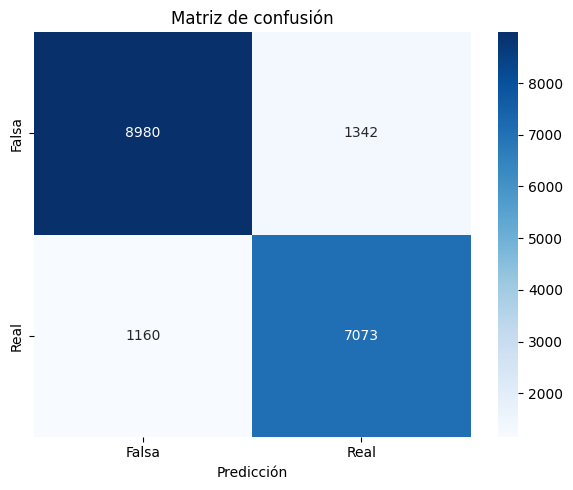

In [9]:
plot_confusion_matrix(y_test, predictions_title)

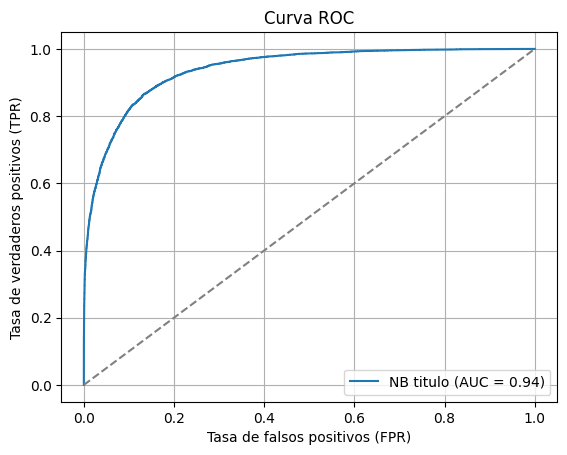

In [10]:
plot_roc_auc(NBtitle, X_test, y_test, label='NB titulo')

### Naive Bayes solo con texto

In [11]:
X = df[['text', 'category']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)


In [12]:
NBbody = train_naive_bayes(X_train, y_train)

predictions_body=NBbody.predict(X_test)
print(confusion_matrix(y_test, predictions_body))
print('\n')
print(classification_report(y_test, predictions_body))

Mejores parámetros encontrados: {'clf__alpha': 0.01, 'clf__fit_prior': True}
Mejor accuracy promedio (cv=5): 0.8313159188664443
[[8666 1656]
 [1465 6768]]


              precision    recall  f1-score   support

           0       0.86      0.84      0.85     10322
           1       0.80      0.82      0.81      8233

    accuracy                           0.83     18555
   macro avg       0.83      0.83      0.83     18555
weighted avg       0.83      0.83      0.83     18555



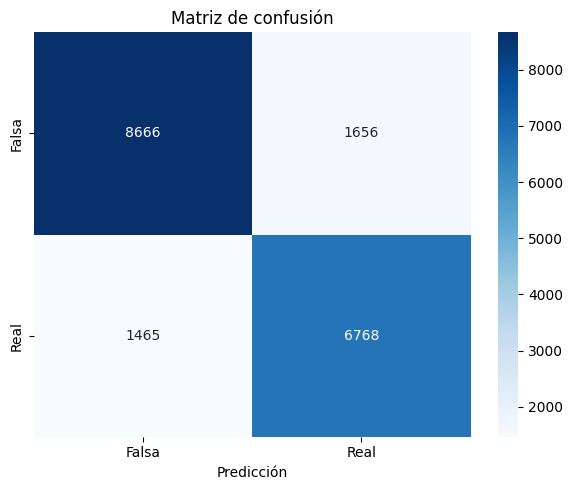

In [13]:
plot_confusion_matrix(y_test, predictions_body)

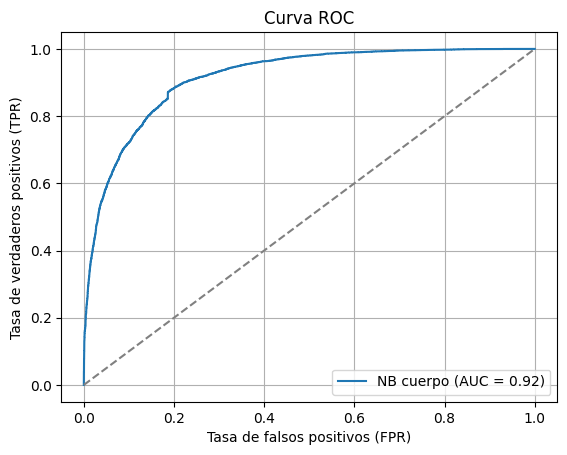

In [14]:
plot_roc_auc(NBbody, X_test, y_test, label='NB cuerpo')

### Naive Bayes con titulo y cuerpo

In [15]:
X = df[['sentences', 'category']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [16]:
NBtotal = train_naive_bayes(X_train, y_train)

predictions_total=NBtotal.predict(X_test)
print(confusion_matrix(y_test, predictions_total))
print('\n')
print(classification_report(y_test, predictions_total))

Mejores parámetros encontrados: {'clf__alpha': 0.01, 'clf__fit_prior': True}
Mejor accuracy promedio (cv=5): 0.8430035995112795
[[8703 1619]
 [1358 6875]]


              precision    recall  f1-score   support

           0       0.87      0.84      0.85     10322
           1       0.81      0.84      0.82      8233

    accuracy                           0.84     18555
   macro avg       0.84      0.84      0.84     18555
weighted avg       0.84      0.84      0.84     18555



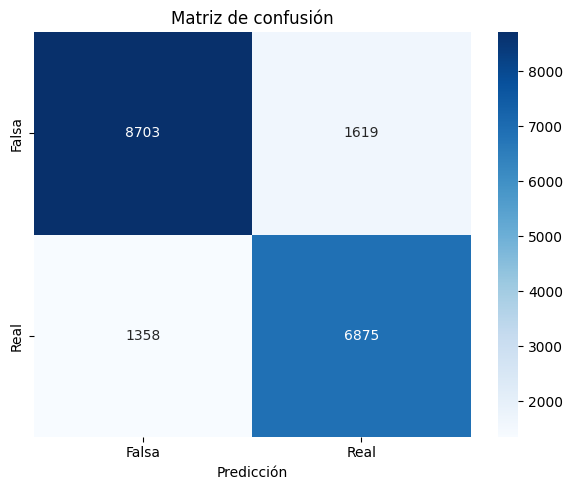

In [17]:
plot_confusion_matrix(y_test, predictions_total)

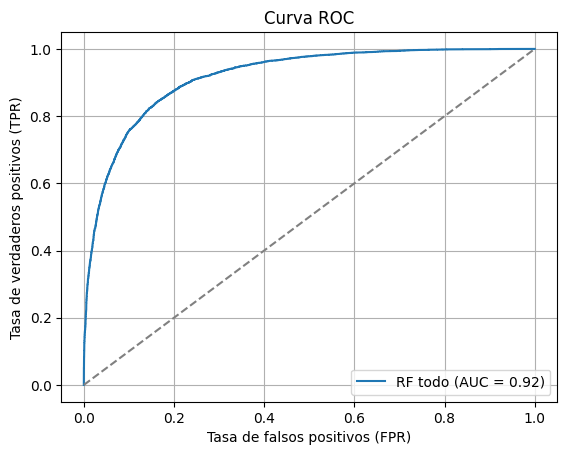

In [18]:
plot_roc_auc(NBtotal, X_test, y_test, label='RF todo')

In [19]:
save_model(NBtitle, 'naive_bayes_title')
save_model(NBbody, 'naive_bayes_body')
save_model(NBtotal, 'naive_bayes_total')

NameError: name 'save_model' is not defined